# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [3]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [7]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [9]:
fraud.shape

(1000000, 8)

- Check for anomalies

In [14]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

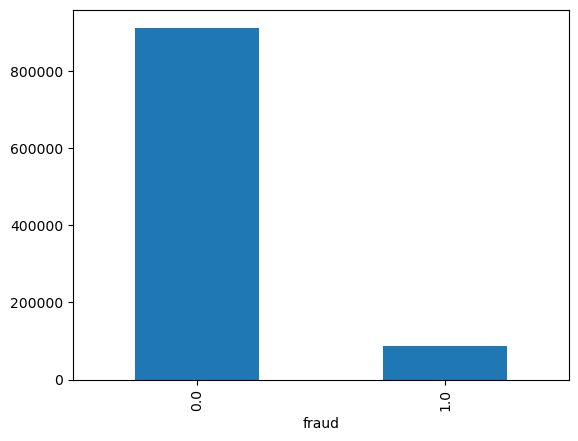

In [22]:
target = fraud["fraud"].value_counts()
target.plot(kind="bar")
plt.show()

- **2.** Train a LogisticRegression.

In [33]:
 # train a Logistic Regression in imbalanced data.
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
log_reg = LogisticRegression()

In [50]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [53]:
log_reg.score(X_test_scaled, y_test)

0.958716

In [57]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228103
         1.0       0.89      0.60      0.72     21897

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

In [62]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [67]:
train["fraud"] = y_train.values

In [69]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.042277,1.066000,-0.145458,0.366675,-0.734509,-0.334660,-1.365142,0.0
1,-0.349971,-0.122214,-0.189903,0.366675,-0.734509,-0.334660,-1.365142,0.0
2,0.613577,0.072244,-0.321644,0.366675,-0.734509,-0.334660,-1.365142,0.0
3,0.859708,-0.185743,-0.573858,0.366675,-0.734509,2.988106,0.732525,0.0
4,-0.129404,0.053836,-0.472851,0.366675,-0.734509,-0.334660,0.732525,0.0
...,...,...,...,...,...,...,...,...
749995,-0.163621,0.080110,0.504901,0.366675,-0.734509,-0.334660,0.732525,0.0
749996,-0.364627,-0.097483,-0.269987,0.366675,1.361453,-0.334660,-1.365142,0.0
749997,0.030398,-0.164452,0.279865,0.366675,-0.734509,-0.334660,0.732525,0.0
749998,-0.259224,0.030243,-0.544464,0.366675,1.361453,-0.334660,0.732525,0.0


In [74]:
is_fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [76]:
len(is_fraud),len(no_fraud)

(65506, 684494)

In [80]:
yes_oversampled = resample(is_fraud,
                                    replace=True,
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [84]:
train_over = pd.concat([yes_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31657,0.079220,-0.169573,1.431336,0.366675,-0.734509,-0.33466,0.732525,1.0
499569,-0.124939,-0.153203,0.934524,0.366675,-0.734509,-0.33466,0.732525,1.0
488452,2.547294,-0.184893,0.144257,0.366675,-0.734509,-0.33466,0.732525,1.0
600151,0.825512,-0.158657,0.946314,0.366675,-0.734509,-0.33466,0.732525,1.0
526078,-0.261619,-0.156757,2.525960,0.366675,1.361453,-0.33466,0.732525,1.0
...,...,...,...,...,...,...,...,...
749995,-0.163621,0.080110,0.504901,0.366675,-0.734509,-0.33466,0.732525,0.0
749996,-0.364627,-0.097483,-0.269987,0.366675,1.361453,-0.33466,-1.365142,0.0
749997,0.030398,-0.164452,0.279865,0.366675,-0.734509,-0.33466,0.732525,0.0
749998,-0.259224,0.030243,-0.544464,0.366675,1.361453,-0.33466,0.732525,0.0


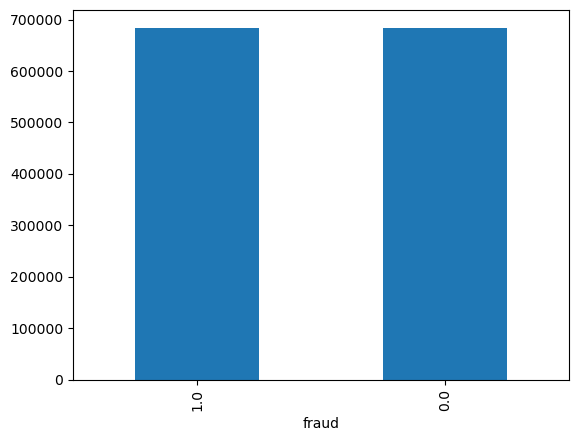

In [87]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [93]:
# Now, with balanced data, we will create a new instance of Logistic Regression.
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [96]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [103]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    228103
         1.0       0.58      0.95      0.72     21897

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



<br>
<br>

- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [107]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.042277,1.066000,-0.145458,0.366675,-0.734509,-0.334660,-1.365142,0.0
1,-0.349971,-0.122214,-0.189903,0.366675,-0.734509,-0.334660,-1.365142,0.0
2,0.613577,0.072244,-0.321644,0.366675,-0.734509,-0.334660,-1.365142,0.0
3,0.859708,-0.185743,-0.573858,0.366675,-0.734509,2.988106,0.732525,0.0
4,-0.129404,0.053836,-0.472851,0.366675,-0.734509,-0.334660,0.732525,0.0
...,...,...,...,...,...,...,...,...
749995,-0.163621,0.080110,0.504901,0.366675,-0.734509,-0.334660,0.732525,0.0
749996,-0.364627,-0.097483,-0.269987,0.366675,1.361453,-0.334660,-1.365142,0.0
749997,0.030398,-0.164452,0.279865,0.366675,-0.734509,-0.334660,0.732525,0.0
749998,-0.259224,0.030243,-0.544464,0.366675,1.361453,-0.334660,0.732525,0.0


In [112]:
no_undersampled = resample(no_fraud,
                                    replace=False,
                                    n_samples = len(is_fraud),
                                    random_state=0)
no_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
183849,-0.185139,-0.138825,-0.606320,0.366675,1.361453,-0.33466,-1.365142,0.0
95041,-0.402006,-0.173878,-0.613527,-2.727211,1.361453,-0.33466,-1.365142,0.0
36386,-0.321864,-0.163590,-0.295068,0.366675,-0.734509,-0.33466,0.732525,0.0
54789,-0.371081,-0.187147,0.414614,0.366675,1.361453,-0.33466,0.732525,0.0
418930,-0.386033,-0.146869,0.742079,-2.727211,-0.734509,-0.33466,0.732525,0.0
...,...,...,...,...,...,...,...,...
3942,-0.358060,-0.181801,-0.452274,0.366675,-0.734509,-0.33466,-1.365142,0.0
15147,-0.279894,-0.121831,-0.571234,0.366675,-0.734509,-0.33466,0.732525,0.0
262920,-0.072345,-0.119248,-0.461147,0.366675,-0.734509,-0.33466,-1.365142,0.0
42404,-0.367079,-0.068424,-0.632244,0.366675,1.361453,-0.33466,0.732525,0.0


In [115]:
train_under = pd.concat([no_undersampled, is_fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
183849,-0.185139,-0.138825,-0.606320,0.366675,1.361453,-0.33466,-1.365142,0.0
95041,-0.402006,-0.173878,-0.613527,-2.727211,1.361453,-0.33466,-1.365142,0.0
36386,-0.321864,-0.163590,-0.295068,0.366675,-0.734509,-0.33466,0.732525,0.0
54789,-0.371081,-0.187147,0.414614,0.366675,1.361453,-0.33466,0.732525,0.0
418930,-0.386033,-0.146869,0.742079,-2.727211,-0.734509,-0.33466,0.732525,0.0
...,...,...,...,...,...,...,...,...
749951,-0.379959,0.142757,3.274947,-2.727211,-0.734509,-0.33466,-1.365142,1.0
749958,4.184465,0.072126,1.204239,0.366675,-0.734509,-0.33466,0.732525,1.0
749970,3.542913,-0.119041,-0.602489,0.366675,-0.734509,-0.33466,0.732525,1.0
749984,-0.301889,-0.187858,1.839884,0.366675,-0.734509,-0.33466,0.732525,1.0


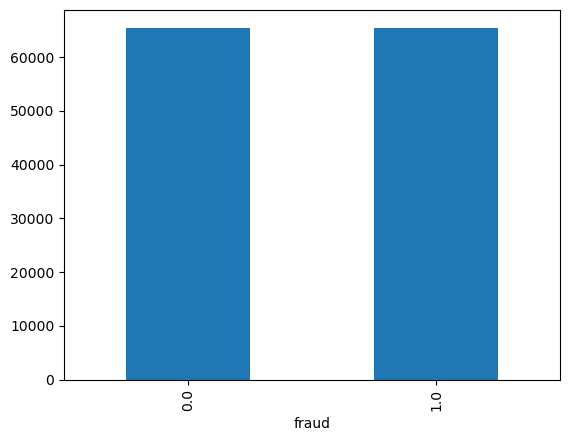

In [124]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

Now, we have the same amount of observations for both is_fraud and no_fraud. Let's see how it can impact our model

In [129]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [134]:
# model training
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [137]:
# Evaluate the model
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228103
         1.0       0.57      0.95      0.72     21897

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



<br>
<br>

- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [141]:
from imblearn.over_sampling import SMOTE

In [145]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [148]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [152]:
# Now lets train our model, to see if get any improvements.
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [155]:
# evaluate the model
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    228103
         1.0       0.58      0.95      0.72     21897

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



- The model's ability to detect fraud has definitely improved after applying SMOTE, with recall increasing to 0.95. This is a significant improvement, especially for imbalanced datasets where detecting the minority class (fraud) is critical.
- Trade-off: The precision of 0.58 indicates some false positives, but this might be acceptable  (detecting all fraud cases is more important than minimizing false positives).